# Joyplots

In [1]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt

## Obligatory iris stuff

Though not a great fit for this kind of visualization, we can generate some joyplots with the `iris` dataset.

In [2]:
iris = pd.read_csv("data/iris.csv")

By default, `joypy.joyplot()` will draw joyplot with a density subplot for each numeric column in the dataframe.
The density is obtained with the `gaussian_kde` function of `scipy`.

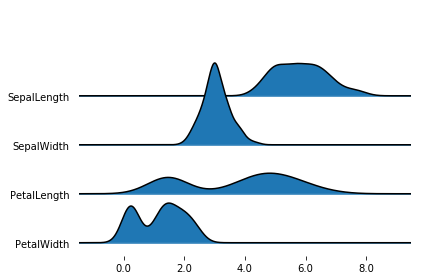

In [3]:
%matplotlib inline
fig, axes = joypy.joyplot(iris)

If you pass a grouped dataframe, or if you pass a column name to the `by` argument, you get a density plot
for each value in the grouped column.

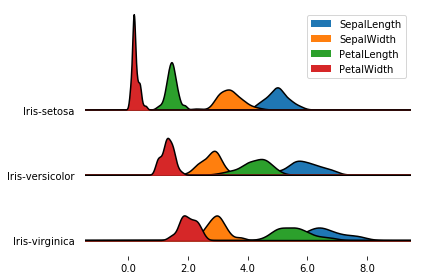

In [4]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, by="Name")

In the previous plot, one subplot had a much larger `y` extensions than the others.
Since, by default, the subplots share the `y`-limits, the outlier causes all the other subplots to be quite
compressed.

We can change this behavior letting each subplot take up the whole `y` space with `ylim='own'`, as follows.

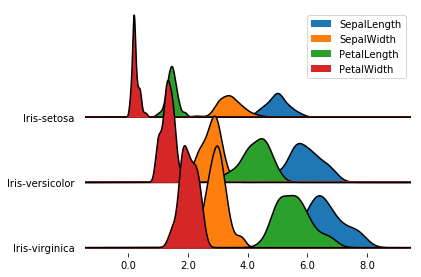

In [5]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, by="Name", ylim='own')

In this case, we achieved more overlap, but the subplots are no longer directly comparable.

Yet another option is to keep the default ylim behavior (i.e., `ylim='max'`),
and simply increase the overlap factor:

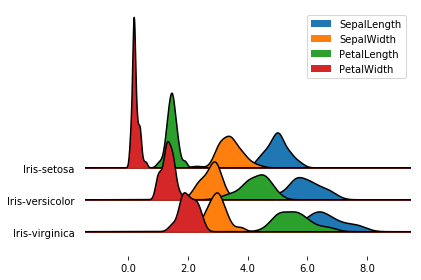

In [6]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, by="Name", overlap=3)

It's also possible to draw histograms with `hist=True`, though they don't look nice when overlapping, 
so it's better to set `overlap=0`.

With `grid=True` or `grid='both'` you also get grid lines on both axis.

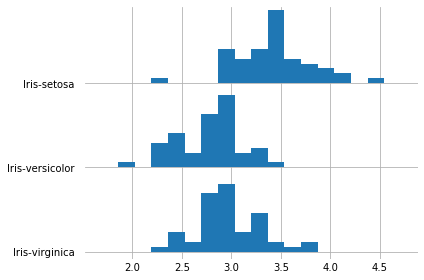

In [7]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, by="Name", column="SepalWidth",
                          hist="True", bins=20, overlap=0,
                          grid=True, legend=False)

## Global daily temperatures

Something that is probably a better fit for joyplots than `iris`: let's visualize the distribution of
global daily temperatures from 1880 to 2014.

(The original file can be found [here](http://berkeleyearth.org/data/))

In [8]:
%matplotlib inline

temp = pd.read_csv("data/daily_temp.csv",comment="%")
temp.head()

,Date Number,Year,Month,Day,Day of Year,Anomaly
0,1880.001,1880,1,1,1,-0.808
1,1880.004,1880,1,2,2,-0.670
2,1880.007,1880,1,3,3,-0.740
3,1880.010,1880,1,4,4,-0.705
4,1880.012,1880,1,5,5,-0.752


The column `Anomaly` contains the global daily temperature (in °C) computed as the difference between the
daily value and the 1950-1980 global average.
We can draw the distribution of the temperatures in time, grouping by `Year`, to see
how the daily temperature distribution shifted across time.

Since the `y` label would get pretty crammed if we were to show all the year labels, we first prepare
a list where we leave only the multiples of 10.

To reduce the clutter, the option `range_style='own'` limits 
the `x` range of each individual density plot to the range where the density is non-zero
(+ an "aestethic" tolerance to avoid cutting the tails too early/abruptly).

With `fade=True`, the subplots also get a progressively larger alpha value.

(Grouping the dataframe and computing the density plots can take a few seconds here.)

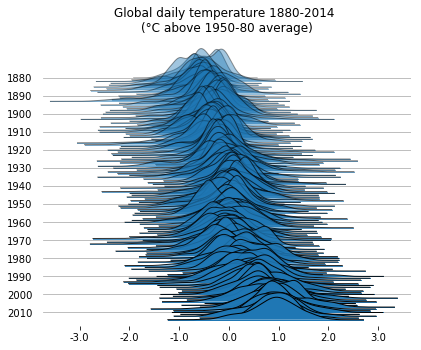

In [9]:
%matplotlib inline

labels=[y if y%10==0 else None for y in list(temp.Year.unique())]
fig, axes = joypy.joyplot(temp, by="Year", column="Anomaly", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(6,5),
                          title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)")

If you want, you can also plot the raw counts, rather than the estimated density. 
This makes for noisier plots, but they might be preferable in some cases.

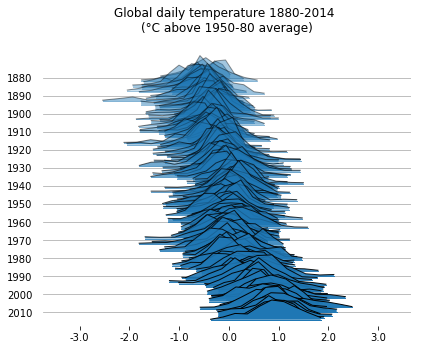

In [10]:
%matplotlib inline

labels=[y if y%10==0 else None for y in list(temp.Year.unique())]
fig, axes = joypy.joyplot(temp, by="Year", column="Anomaly", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(6,5),
                          title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)",
                          kind="counts")

Finally, just for fun, let's plot the same data as it were on the cover of Unknown Pleasures,
the Joy Division's album where the nickname to this kind of visualization comes from.

No labels/grids, no filling, black background, white lines, and a couple of adjustments just to make it look a bit more like the album cover. 

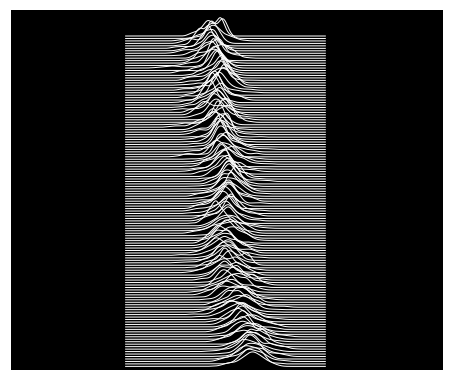

In [11]:
%matplotlib inline

fig, axes = joypy.joyplot(temp,by="Year", column="Anomaly", ylabels=False, xlabels=False, 
                          grid=False, fill=False, background='k', linecolor="w", linewidth=1,
                          legend=False, overlap=0.5, figsize=(6,5))

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes[:-1]:
    a.set_xlim([-8,8])      